In [ ]:
!pip install pycaret

Dataset: https://www.kaggle.com/datasets/uom190346a/disease-symptoms-and-patient-profile-dataset

In [ ]:
# Loading and understanding the dataset
import pandas as pd
import numpy as np
df = pd.read_csv("/content/Disease_symptom_and_patient_profile_dataset.csv")
print(df.head())
df = df.dropna(subset=['Outcome Variable'])

# Drop the disease column: we just want to know if a set of symptoms results in positive result in general
df = df.drop(columns=['Disease'])

       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive  


In [ ]:
df.shape

(349, 9)

In [ ]:
df.info

<bound method DataFrame.info of     Fever Cough Fatigue Difficulty Breathing  Age  Gender Blood Pressure  \
0     Yes    No     Yes                  Yes   19  Female            Low   
1      No   Yes     Yes                   No   25  Female         Normal   
2      No   Yes     Yes                   No   25  Female         Normal   
3     Yes   Yes      No                  Yes   25    Male         Normal   
4     Yes   Yes      No                  Yes   25    Male         Normal   
..    ...   ...     ...                  ...  ...     ...            ...   
344   Yes    No     Yes                   No   80  Female           High   
345   Yes    No     Yes                   No   85    Male           High   
346   Yes    No     Yes                   No   85    Male           High   
347   Yes    No     Yes                   No   90  Female           High   
348   Yes    No     Yes                   No   90  Female           High   

    Cholesterol Level Outcome Variable  
0             

In [ ]:
# init setup
from pycaret.classification import *
setup(df, target = 'Outcome Variable', session_id = 123)

# model training and selection
best = compare_models()

# evaluate trained model
evaluate_model(best)

,Description,Value
0,Session id,123
1,Target,Outcome Variable
2,Target type,Binary
3,Target mapping,"Negative: 0, Positive: 1"
4,Original data shape,"(349, 9)"
5,Transformed data shape,"(349, 13)"
6,Transformed train set shape,"(244, 13)"
7,Transformed test set shape,"(105, 13)"
8,Ordinal features,5
9,Numeric features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7818,0.8677,0.8154,0.7855,0.7961,0.5619,0.5705,0.3590
et,Extra Trees Classifier,0.7698,0.8587,0.7923,0.7821,0.7823,0.5387,0.5482,0.2340
dt,Decision Tree Classifier,0.7547,0.7648,0.7538,0.7908,0.7663,0.5087,0.5168,0.1100
xgboost,Extreme Gradient Boosting,0.7537,0.8216,0.7769,0.7719,0.7697,0.5056,0.5150,0.2350
gbc,Gradient Boosting Classifier,0.7248,0.7964,0.7769,0.7333,0.7495,0.4459,0.4546,0.1640
lightgbm,Light Gradient Boosting Machine,0.6847,0.7722,0.6769,0.7230,0.6945,0.3700,0.3745,0.2890
knn,K Neighbors Classifier,0.6442,0.6963,0.7000,0.6660,0.6753,0.2839,0.2913,0.1170
nb,Naive Bayes,0.6425,0.6933,0.7462,0.6357,0.6794,0.2758,0.2987,0.1040
ridge,Ridge Classifier,0.6390,0.0000,0.6615,0.6616,0.6540,0.2759,0.2836,0.1920
lda,Linear Discriminant Analysis,0.6390,0.7133,0.6615,0.6616,0.6540,0.2759,0.2836,0.1090


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Use the best model to make predictions on the original data
predict_model(best, df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9112,0.9645,0.9112,0.9138,0.9108,0.8206,0.8237


,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,prediction_label,prediction_score
0,Yes,No,Yes,Yes,19,Female,Low,Normal,1,Positive,0.87
1,No,Yes,Yes,No,25,Female,Normal,Normal,0,Negative,0.97
2,No,Yes,Yes,No,25,Female,Normal,Normal,0,Negative,0.97
3,Yes,Yes,No,Yes,25,Male,Normal,Normal,1,Positive,0.98
4,Yes,Yes,No,Yes,25,Male,Normal,Normal,1,Positive,0.98
...,...,...,...,...,...,...,...,...,...,...,...
344,Yes,No,Yes,No,80,Female,High,High,1,Positive,1.00
345,Yes,No,Yes,No,85,Male,High,High,1,Positive,0.85
346,Yes,No,Yes,No,85,Male,High,High,1,Positive,0.85
347,Yes,No,Yes,No,90,Female,High,High,1,Positive,1.00


In [ ]:
# Train just the best model and view hyperparameters
rf = create_model('rf')

# View the hyperparameters
print(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8718,0.7692,0.8333,0.8000,0.6006,0.6026
1,0.8800,0.9391,1.0000,0.8125,0.8966,0.7573,0.7806
2,0.7600,0.8397,0.9231,0.7059,0.8000,0.5130,0.5424
3,0.9200,0.9744,1.0000,0.8667,0.9286,0.8387,0.8498
4,0.6667,0.7308,0.6923,0.6923,0.6923,0.3287,0.3287
5,0.8333,0.9441,0.9231,0.8000,0.8571,0.6596,0.6693
6,0.6667,0.8427,0.6154,0.7273,0.6667,0.3379,0.3427
7,0.9583,0.9406,0.9231,1.0000,0.9600,0.9167,0.9199
8,0.7917,0.8322,0.7692,0.8333,0.8000,0.5833,0.5854


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.9006,0.7692,0.8333,0.8000,0.6006,0.6026
1,0.8800,0.9135,0.9231,0.8571,0.8889,0.7588,0.7613
2,0.8000,0.8429,0.9231,0.7500,0.8276,0.5955,0.6138
3,0.9200,0.9583,1.0000,0.8667,0.9286,0.8387,0.8498
4,0.5833,0.7098,0.5385,0.6364,0.5833,0.1724,0.1748
5,0.8333,0.8916,0.8462,0.8462,0.8462,0.6643,0.6643
6,0.7917,0.8531,0.8462,0.7857,0.8148,0.5775,0.5795
7,0.9583,0.9231,0.9231,1.0000,0.9600,0.9167,0.9199
8,0.7500,0.7867,0.7692,0.7692,0.7692,0.4965,0.4965


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8974,0.7692,0.8333,0.8000,0.6006,0.6026
1,0.8400,0.9295,1.0000,0.7647,0.8667,0.6753,0.7140
2,0.8000,0.8333,0.9231,0.7500,0.8276,0.5955,0.6138
3,0.8800,0.9872,0.9231,0.8571,0.8889,0.7588,0.7613
4,0.6667,0.7343,0.6923,0.6923,0.6923,0.3287,0.3287
5,0.8750,0.9091,0.9231,0.8571,0.8889,0.7465,0.7492
6,0.6667,0.8392,0.6154,0.7273,0.6667,0.3379,0.3427
7,0.9583,0.9266,0.9231,1.0000,0.9600,0.9167,0.9199
8,0.7083,0.8042,0.6923,0.7500,0.7200,0.4167,0.4181


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8846,0.7692,0.8333,0.8000,0.6006,0.6026
1,0.8800,0.9391,1.0000,0.8125,0.8966,0.7573,0.7806
2,0.8000,0.8333,0.9231,0.7500,0.8276,0.5955,0.6138
3,0.8800,0.9872,0.9231,0.8571,0.8889,0.7588,0.7613
4,0.7083,0.7483,0.6923,0.7500,0.7200,0.4167,0.4181
5,0.8333,0.9161,0.9231,0.8000,0.8571,0.6596,0.6693
6,0.6667,0.8531,0.6154,0.7273,0.6667,0.3379,0.3427
7,0.9583,0.9301,0.9231,1.0000,0.9600,0.9167,0.9199
8,0.7917,0.8287,0.7692,0.8333,0.8000,0.5833,0.5854


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8718,0.7692,0.8333,0.8000,0.6006,0.6026
1,0.8800,0.9455,1.0000,0.8125,0.8966,0.7573,0.7806
2,0.7600,0.8365,0.9231,0.7059,0.8000,0.5130,0.5424
3,0.8800,0.9808,0.9231,0.8571,0.8889,0.7588,0.7613
4,0.7083,0.7273,0.6923,0.7500,0.7200,0.4167,0.4181
5,0.8333,0.9441,0.9231,0.8000,0.8571,0.6596,0.6693
6,0.7500,0.8497,0.7692,0.7692,0.7692,0.4965,0.4965
7,0.9583,0.9336,0.9231,1.0000,0.9600,0.9167,0.9199
8,0.7917,0.8322,0.7692,0.8333,0.8000,0.5833,0.5854


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8718,0.7692,0.8333,0.8000,0.6006,0.6026
1,0.8800,0.9391,1.0000,0.8125,0.8966,0.7573,0.7806
2,0.7600,0.8397,0.9231,0.7059,0.8000,0.5130,0.5424
3,0.9200,0.9744,1.0000,0.8667,0.9286,0.8387,0.8498
4,0.6667,0.7308,0.6923,0.6923,0.6923,0.3287,0.3287
5,0.8333,0.9441,0.9231,0.8000,0.8571,0.6596,0.6693
6,0.6667,0.8427,0.6154,0.7273,0.6667,0.3379,0.3427
7,0.9583,0.9406,0.9231,1.0000,0.9600,0.9167,0.9199
8,0.7917,0.8322,0.7692,0.8333,0.8000,0.5833,0.5854


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

<Axes: >

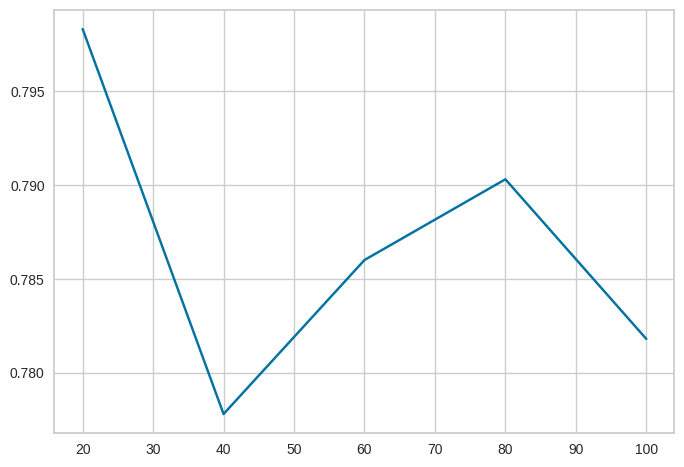

In [ ]:
# Manually tune the n_estimators parameters (representing number of trees in random forest)
results = []

for i in range(20, 120, 20):
  rf = create_model('rf', n_estimators = i)
  results.append(pull().loc[['Mean']])

results = pd.concat(results, axis=0)['Accuracy']
results.index = np.arange(20, 120, 20)
results.plot()

In [ ]:
# Use pycaret to tune parameters for us

# Create random forest model
rf = create_model('rf')

# tune model using default RandomGridSearch
tuned_model = tune_model(rf, choose_better = True, n_iter = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8718,0.7692,0.8333,0.8000,0.6006,0.6026
1,0.8800,0.9391,1.0000,0.8125,0.8966,0.7573,0.7806
2,0.7600,0.8397,0.9231,0.7059,0.8000,0.5130,0.5424
3,0.9200,0.9744,1.0000,0.8667,0.9286,0.8387,0.8498
4,0.6667,0.7308,0.6923,0.6923,0.6923,0.3287,0.3287
5,0.8333,0.9441,0.9231,0.8000,0.8571,0.6596,0.6693
6,0.6667,0.8427,0.6154,0.7273,0.6667,0.3379,0.3427
7,0.9583,0.9406,0.9231,1.0000,0.9600,0.9167,0.9199
8,0.7917,0.8322,0.7692,0.8333,0.8000,0.5833,0.5854


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6800,0.8141,0.6154,0.7273,0.6667,0.3631,0.3677
1,0.8400,0.8333,0.9231,0.8000,0.8571,0.6774,0.6864
2,0.6000,0.7179,0.7692,0.5882,0.6667,0.1883,0.1991
3,0.8800,0.9103,0.9231,0.8571,0.8889,0.7588,0.7613
4,0.6667,0.7413,0.6923,0.6923,0.6923,0.3287,0.3287
5,0.6250,0.7832,0.6923,0.6429,0.6667,0.2394,0.2403
6,0.7083,0.8392,0.7692,0.7143,0.7407,0.4085,0.4099
7,0.5417,0.6364,0.4615,0.6000,0.5217,0.0959,0.0989
8,0.7083,0.7552,0.6923,0.7500,0.7200,0.4167,0.4181


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Challenge: Either use tuned_model or manual hyperparamter tuning to find the best set of hyperparamters of any model on this dataset. The people with 3 highest accuracy get prize